#### Using master branch on AllenSDK and feature/update_response_analysis branch on VBA (current as of 4/29/20)

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from visual_behavior import database as db
from allensdk.brain_observatory.behavior.behavior_ophys_session import BehaviorOphysSession
import seaborn as sns

/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_api/behavior_ophys_nwb_api.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
%load_ext autoreload
%autoreload 2
%widescreen

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
def load_flashwise_summary(behavior_session_id=None):
    conn = db.Database('visual_behavior_data')
    collection = conn['behavior_analysis']['annotated_stimulus_presentations']

    if behavior_session_id is None:
        # load all
        df = pd.DataFrame(list(collection.find({})))
    else:
        # load data from one behavior session
        df = pd.DataFrame(list(collection.find({'behavior_session_id':behavior_session_id})))

    conn.close()
    
    return df.sort_values(by=['behavior_session_id','flash_index'])

In [6]:
%%time
flash_summary = load_flashwise_summary()

CPU times: user 16.1 s, sys: 1.76 s, total: 17.9 s
Wall time: 22.4 s


In [7]:
flash_summary.head()

,_id,flash_index,image_index,image_name,omitted,change,licked,lick_rate,rewarded,reward_rate,running_rate,bout_rate,hit_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick,high_reward,flash_metrics_epochs,flash_metrics_labels,in_bout,bias,omissions1,task0,timing1D,start_time,start_frame,stop_time,epoch,behavior_session_id,criterion_negative,motivation_state,session_cluster_id,session_cluster_name
15211,5e94f5d0169f851f157f3673,0,0,im000,0,0,1,1.333333,0,0.0,-0.022192,1.333333,0.0,0.0,0.0,0.0,1.000000,0.000000,-4.652696,0.000000,1,0,2,"high-lick,low-reward",0,-1.287449,1.415083,1.557318,1.017082,300.012799,17986,300.262966,0.0,788017709,-2.326348,under_motivated,NaN,NaN
15230,5e94f5d0169f851f157f3674,1,0,im000,0,0,1,1.333333,0,0.0,-0.023204,1.000000,0.0,0.0,0.0,0.0,0.750000,0.250000,-3.000838,-0.825929,1,0,2,"high-lick,low-reward",1,-1.287449,1.415083,1.557318,1.017082,300.763410,18031,301.013806,0.0,788017709,-2.326348,under_motivated,NaN,NaN
15250,5e94f5d0169f851f157f3675,2,0,im000,0,0,0,1.185185,0,0.0,-0.017601,0.740741,0.0,0.0,0.0,0.0,0.555556,0.444444,-2.466058,-1.093319,1,0,2,"high-lick,low-reward",0,-1.288889,1.415083,1.557330,1.024391,301.514013,18076,301.764218,0.0,788017709,-2.326348,under_motivated,NaN,NaN
15269,5e94f5d0169f851f157f3676,3,0,im000,0,0,0,1.000000,0,0.0,-0.003088,0.583333,0.0,0.0,0.0,0.0,0.437500,0.562500,-2.169037,-1.241829,1,0,2,"high-lick,low-reward",0,-1.290100,1.415083,1.557341,1.030542,302.264608,18121,302.514853,0.0,788017709,-2.326348,under_motivated,NaN,NaN
15288,5e94f5d0169f851f157f3677,4,0,im000,0,0,0,0.853333,0,0.0,0.008297,0.480000,0.0,0.0,0.0,0.0,0.360000,0.640000,-1.967889,-1.342403,1,0,2,"high-lick,low-reward",0,-1.291076,1.415083,1.557349,1.035589,303.015254,18166,303.265429,0.0,788017709,-2.326348,under_motivated,NaN,NaN


In [8]:
959681045 in list(flash_summary['behavior_session_id'].unique())

False

### get experiments from behavior project cache 

In [9]:
import visual_behavior.data_access.loading as loading

In [10]:
cache = loading.get_visual_behavior_cache()

In [13]:
# experiments_table = cache.get_experiment_table() 
experiments_table = loading.get_filtered_ophys_experiment_table()

In [14]:
experiments_table.head()

,ophys_experiment_id,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,location
0,953659743,952430817,952554548,1018028345,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISp_225
3,953659749,952430817,952554548,1018028354,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],150,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISl_150
4,953659752,952430817,952554548,1018028357,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISl_225
6,953659745,952430817,952554548,1018028339,VisualBehaviorMultiscope,holding,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,858992726,850862430,F,209.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,Sst_VISp_75
8,958527481,954954402,953982960,1018028357,VisualBehaviorMultiscope,holding,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,858992726,850862430,F,210.0,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,['Ai148(TIT2L-GC6f-ICL-tTA2)'],['Sst-IRES-Cre'],225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,Sst_VISl_225


In [15]:
experiments_table['in_flash_summary'] = experiments_table['behavior_session_id'].map(lambda bsid: bsid in list(flash_summary['behavior_session_id'].unique()))

experiments_table['in_flash_summary'].value_counts()

False    1531
True      110
Name: in_flash_summary, dtype: int64

In [11]:
# get some experiment
aribtrary_index = 50
experiment_id = experiments_table.query('in_flash_summary == True').index.values[aribtrary_index]

In [12]:
experiment_id

965228792

In [13]:
behavior_session_id = experiments_table.loc[experiment_id]['behavior_session_id']

### get SDK dataset object through VBA loading function

In [14]:
# this is the cache directory where the output of convert code and response analysis code goes
cache_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\visual_behavior_production_analysis'.replace('\\','/')

In [16]:
# this function gets an SDK session object then does a bunch of reformatting to fix things
# can be slow to load due to reformatting - better to make this a class and use lazy loading
dataset = loading.get_sdk_dataset(experiment_id, cache_dir)

ERROR:visual_behavior.ophys.io.lims_database:cannot query specimen driver line: can't adapt type 'numpy.int64'
ERROR:visual_behavior.ophys.io.lims_database:cannot query specimen reporter line: can't adapt type 'numpy.int64'


Analysis folder exists
/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/visual_behavior_production_analysis/965228792_467302_191010_VISp_290_cre_line_unknown_2P5_behavior_4imagesB


/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/home/dougo/Code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


### create ResponseAnalysis object

In [17]:
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

In [18]:
analysis = ResponseAnalysis(dataset) 

### ResponseAnalysis provides access to time aligned cell responses for flashes, omissions, and trials

In [19]:
# if this has been run previously, it will load a cached dataframe
# if it is the first time it has been run for this experiment, it will generate the dataframe and save it (slow)
sdf = analysis.get_response_df(df_name='stimulus_response_df')

loading stimulus_response_df


## replace 'start_time' column in flash summary with values from sdf. Flash summary has PKL times and should have sync times instead

In [131]:
sdf[:5]

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,p_value_baseline,duration,end_frame,image_index,image_name,image_set,index,omitted,orientation,start_frame,start_time,stop_time,prior_image_name,time_from_last_lick,time_from_last_reward,time_from_last_change,change,block_index,image_block_repetition,index_within_block,licks,rewards,mean_running_speed,pre_flash_running_speed,flash_after_omitted,flash_after_change,response_latency,response_binary,early_lick,licked,lick_rate,rewarded,reward_rate,running_rate
0,0,1007088486,"[0.018550334739538717, -0.0902980119947608, -0...","[-0.48466557325045084, -0.4523545350337541, -0...",0.004843,NaN,0.0897,0.6790,0.529563,0.2502,18002.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,0,False,NaN,17987,309.911006,310.161206,None,31.163465,NaN,NaN,False,0,0,0.0,"[310.4566777659524, 310.6234777200484]",[],-0.686436,-0.679576,False,False,0.545672,True,False,1,1.333333,0,0.0,-0.915248
1,0,1007088554,"[-0.039447347697473684, 0.05181858806916224, 0...","[-0.48466557325045084, -0.4523545350337541, -0...",-0.022223,NaN,0.9172,0.9604,0.070817,0.2502,18002.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,0,False,NaN,17987,309.911006,310.161206,None,31.163465,NaN,NaN,False,0,0,0.0,"[310.4566777659524, 310.6234777200484]",[],-0.686436,-0.679576,False,False,0.545672,True,False,1,1.333333,0,0.0,-0.915248
2,0,962541896,"[-0.0005595549413241821, -0.05354869157662227,...","[-0.48466557325045084, -0.4523545350337541, -0...",0.074630,NaN,0.1849,0.2482,0.000943,0.2502,18002.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,0,False,NaN,17987,309.911006,310.161206,None,31.163465,NaN,NaN,False,0,0,0.0,"[310.4566777659524, 310.6234777200484]",[],-0.686436,-0.679576,False,False,0.545672,True,False,1,1.333333,0,0.0,-0.915248
3,0,1007088480,"[0.12489803527196326, -0.02612682885827723, -0...","[-0.48466557325045084, -0.4523545350337541, -0...",-0.015541,NaN,0.7695,0.8917,0.505128,0.2502,18002.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,0,False,NaN,17987,309.911006,310.161206,None,31.163465,NaN,NaN,False,0,0,0.0,"[310.4566777659524, 310.6234777200484]",[],-0.686436,-0.679576,False,False,0.545672,True,False,1,1.333333,0,0.0,-0.915248
4,0,1007088540,"[-0.06554734330590145, -0.01630633754360425, 0...","[-0.48466557325045084, -0.4523545350337541, -0...",0.075181,NaN,0.0809,0.2630,0.001697,0.2502,18002.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,0,False,NaN,17987,309.911006,310.161206,None,31.163465,NaN,NaN,False,0,0,0.0,"[310.4566777659524, 310.6234777200484]",[],-0.686436,-0.679576,False,False,0.545672,True,False,1,1.333333,0,0.0,-0.915248


In [132]:
flash_summary_this_session = flash_summary.query('behavior_session_id == @behavior_session_id').copy()
flash_summary_this_session = flash_summary_this_session.drop(columns=['start_time']).merge(
    sdf[['stimulus_presentations_id','start_time']].drop_duplicates(),
    left_on = 'flash_index',
    right_on = 'stimulus_presentations_id',
    how='left'
)
len(flash_summary_this_session)

4800

## merge in the flash summary for this session using the 'stimulus_presentations_id' (in odf) and 'flash_index' (in flash_summary)

NOTE: drop columns from flash_summary that are repeated in sdf, otherwise we get a _x and _y appended

In [108]:
sdfm = sdf.merge(
    flash_summary_this_session.drop(columns=['image_name', 'image_index']),
    left_on = 'stimulus_presentations_id',
    right_on = 'flash_index',
    how = 'left'
)
sdfm.tail()

,stimulus_presentations_id_x,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,p_value_baseline,duration,end_frame,image_index,image_name,image_set,index,omitted_x,orientation,start_frame_x,start_time_x,stop_time_x,prior_image_name,time_from_last_lick,time_from_last_reward,time_from_last_change,change_x,block_index,image_block_repetition,index_within_block,licks,rewards,mean_running_speed,pre_flash_running_speed,flash_after_omitted,flash_after_change,response_latency,response_binary,early_lick,licked_x,lick_rate_x,rewarded_x,reward_rate_x,running_rate_x,_id,flash_index,omitted_y,change_y,licked_y,lick_rate_y,rewarded_y,reward_rate_y,running_rate_y,bout_rate,hit_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick,high_reward,flash_metrics_epochs,flash_metrics_labels,in_bout,bias,omissions1,task0,timing1D,start_frame_y,stop_time_y,epoch,behavior_session_id,criterion_negative,motivation_state,session_cluster_id,session_cluster_name,stimulus_presentations_id_y,start_time_y
580674,4798,1007088498,"[0.0421858844363457, -0.160423271200868, 0.047...","[-0.48466557325045084, -0.4523545350337541, -0...",0.01948,NaN,0.0846,0.3254,0.052919,0.25021,233913.0,5,im054,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,4647,False,NaN,233898,3911.357196,3911.607406,omitted,9.078817,10.075546,10.50853,False,163,2,13.0,"[3911.802786765351, 3911.9361908603123, 3912.1...",[],0.456763,0.859543,True,False,0.445591,True,False,1,0.099974,0,0.005339,29.292673,5e95084f91e8bbfe2e7f37ac,4798,0,0,1,0.099974,0,0.005339,29.976709,0.065339,0.0,0.081706,0.063903,0.936097,0.048008,0.951992,0.14167,-1.593648,0,0,0,"low-lick,low-reward",0,-1.512657,1.761541,1.7675,-1.758727,233898,3901.770262,60.0,965034185,-1.945537,under_motivated,5.0,Grey Screen Impulsive,4798,3911.357196
580675,4798,1007088498,"[0.0421858844363457, -0.160423271200868, 0.047...","[-0.48466557325045084, -0.4523545350337541, -0...",0.01948,NaN,0.0846,0.3254,0.052919,0.25021,233913.0,5,im054,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,4647,False,NaN,233898,3911.357196,3911.607406,omitted,9.078817,10.075546,10.50853,False,163,2,13.0,"[3911.802786765351, 3911.9361908603123, 3912.1...",[],0.456763,0.859543,True,False,0.445591,True,False,1,0.099974,0,0.005339,29.292673,5e95084f91e8bbfe2e7f37ac,4798,0,0,1,0.099974,0,0.005339,29.976709,0.065339,0.0,0.081706,0.063903,0.936097,0.048008,0.951992,0.14167,-1.593648,0,0,0,"low-lick,low-reward",0,-1.512657,1.761541,1.7675,-1.758727,233898,3901.770262,60.0,965034185,-1.945537,under_motivated,5.0,Grey Screen Impulsive,4798,3911.357196
580676,4798,1007088498,"[0.0421858844363457, -0.160423271200868, 0.047...","[-0.48466557325045084, -0.4523545350337541, -0...",0.01948,NaN,0.0846,0.3254,0.052919,0.25021,233913.0,5,im054,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,4647,False,NaN,233898,3911.357196,3911.607406,omitted,9.078817,10.075546,10.50853,False,163,2,13.0,"[3911.802786765351, 3911.9361908603123, 3912.1...",[],0.456763,0.859543,True,False,0.445591,True,False,1,0.099974,0,0.005339,29.292673,5e95084f91e8bbfe2e7f37ac,4798,0,0,1,0.099974,0,0.005339,29.976709,0.065339,0.0,0.081706,0.063903,0.936097,0.048008,0.951992,0.14167,-1.593648,0,0,0,"low-lick,low-reward",0,-1.512657,1.761541,1.7675,-1.758727,233898,3901.770262,60.0,965034185,-1.945537,under_motivated,5.0,Grey Screen Impulsive,4798,3911.357196
580677,4798,1007088498,"[0.0421858844363457, -0.160423271200868, 0.047...","[-0.48466557325045084, -0.4523545350337541, -0...",0.01948,NaN,0.0846,0.3254,0.052919,0.25021,233913.0,5,im054,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,4647,False,NaN,233898,3911.357196,3911.607406,omitted,9.078817,10.075546,10.50853,False,163,2,13.0,"[3911.802786765351, 3911.9361908603123, 3912.1...",[],0.456763,0.859543,True,False,0.445591,True,False,1,0.099974,0,0.005339,29.292673,5e95084f91e8bbfe2e7f37ac,4798,0,0,1,0.099974,0,0.005339,29.976709,0.065339,0.0,0.081706,0

In [75]:
sdfm.keys()

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_omission', 'p_value_stimulus', 'p_value_baseline', 'duration',
       'end_frame', 'image_index_x', 'image_name_x', 'image_set', 'index',
       'omitted_x', 'orientation', 'start_frame_x', 'start_time_x',
       'stop_time_x', 'prior_image_name', 'time_from_last_lick',
       'time_from_last_reward', 'time_from_last_change', 'change_x',
       'block_index', 'image_block_repetition', 'index_within_block', 'licks',
       'rewards', 'mean_running_speed', 'pre_flash_running_speed',
       'flash_after_omitted', 'flash_after_change', 'response_latency',
       'response_binary', 'early_lick', 'licked_x', 'lick_rate_x',
       'rewarded_x', 'reward_rate_x', 'running_rate_x', '_id', 'flash_index',
       'image_index_y', 'image_name_y', 'omitted_y', 'change_y', 'licked_y',
       'lick_rate_y', 'rewarded_y', 'reward_rate_y', 'running_rate_y',
   

In [25]:
sdf['trace_timestamps'].iloc[0].max() - sdf['trace_timestamps'].iloc[0].min()

1.1955084140177787

### plot single trial response for some cell

In [26]:
cell_specimen_id = sdf.cell_specimen_id.unique()[0]

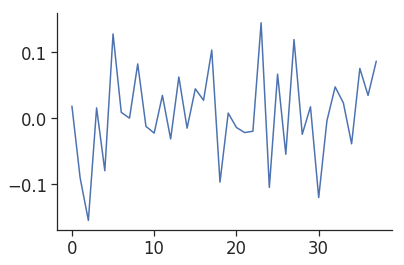

In [27]:
trace = sdf[sdf.cell_specimen_id==cell_specimen_id].trace.values[0]
plt.plot(trace)

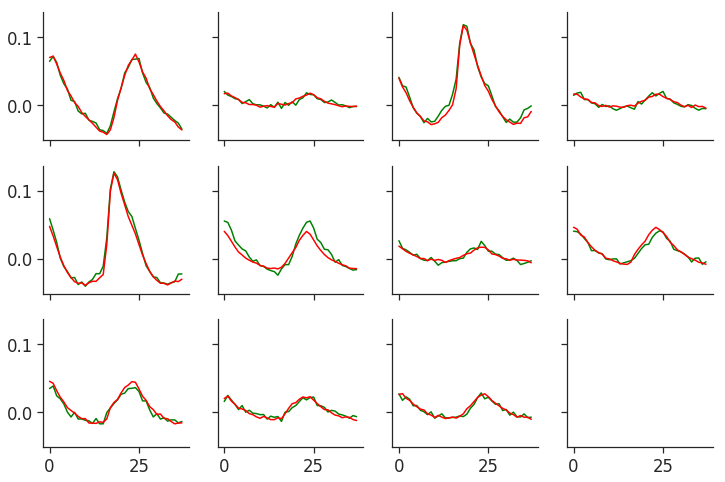

In [109]:
fig,axes = plt.subplots(3,4,figsize=(12,8),sharex=True,sharey=True)
for ii, cell_id in enumerate(odfm.cell_specimen_id.unique()):
    ax = axes.flatten()[ii]
    ax.plot(
        sdfm.query('cell_specimen_id == @cell_id and flash_metrics_labels == "low-lick,low-reward"').trace.mean(),
        color='green'
    )
    ax.plot(
        sdfm.query('cell_specimen_id == @cell_id and flash_metrics_labels != "low-lick,low-reward"').trace.mean(),
        color='red'
    )

In [29]:
flash_summary.query('behavior_session_id == @behavior_session_id')['flash_metrics_labels'].value_counts()

high-lick,low-reward     2035
high-lick,high-reward    2022
low-lick,low-reward       743
Name: flash_metrics_labels, dtype: int64

### plot trial averaged trace for some image

Text(0.5, 0, '2P frames')

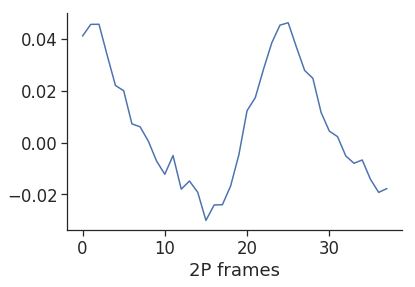

In [30]:
image_name = sdf.image_name.unique()[6]
trace = sdf[(sdf.cell_specimen_id==cell_specimen_id)&(sdf.image_name==image_name)].trace.mean()
plt.plot(trace)
plt.xlabel('dF/F')
plt.xlabel('2P frames')

Text(0.5, 0, '2P frames')

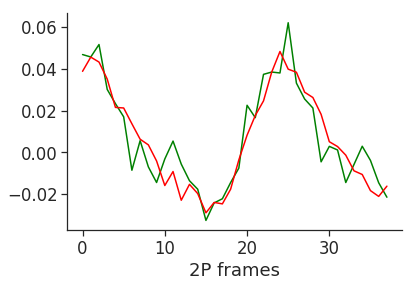

In [95]:
image_name = sdfm.image_name.unique()[6]
fig,ax=plt.subplots()
ax.plot(
    sdf[
        (sdfm.cell_specimen_id==cell_specimen_id)
        &(sdfm.image_name==image_name)
        &(sdfm['flash_metrics_labels'] == "low-lick,low-reward")
    ].trace.mean(),
    color='green'
)
ax.plot(
    sdf[
        (sdfm.cell_specimen_id==cell_specimen_id)
        &(sdfm.image_name==image_name)
        &(sdfm['flash_metrics_labels'] != "low-lick,low-reward")
    ].trace.mean(),
    color='red'
)
ax.set_xlabel('dF/F')
ax.set_xlabel('2P frames')

### set get_extended_stimulus_presentations to True to get stimulus_response_df with lots of extra columns

In [31]:
analysis.use_extended_stimulus_presentations = True # can also set this on creation of ResponseAnalysis object
sdf = analysis.get_response_df(df_name='stimulus_response_df')

loading stimulus_response_df


In [32]:
sdf.keys()

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_omission', 'p_value_stimulus', 'p_value_baseline', 'duration',
       'end_frame', 'image_index', 'image_name', 'image_set', 'index',
       'omitted', 'orientation', 'start_frame', 'start_time', 'stop_time',
       'prior_image_name', 'time_from_last_lick', 'time_from_last_reward',
       'time_from_last_change', 'change', 'block_index',
       'image_block_repetition', 'index_within_block', 'licks', 'rewards',
       'mean_running_speed', 'pre_flash_running_speed', 'flash_after_omitted',
       'flash_after_change', 'response_latency', 'response_binary',
       'early_lick', 'licked', 'lick_rate', 'rewarded', 'reward_rate',
       'running_rate'],
      dtype='object')

### Get change locked responses

In [96]:
analysis.experiment_id

965228792

In [97]:
behavior_session_id

965034185

In [98]:
db.lims_query("select * from behavior_sessions where id = '{}'".format(behavior_session_id))

,id,behavior_training_id,created_at,updated_at,storage_directory,temp_output_file_location,foraging_id,donor_id,ophys_session_id,equipment_id,user_id,ecephys_session_id
0,965034185,None,2019-10-10 20:00:56.227242,2019-10-11 04:03:56.184725,/allen/programs/braintv/production/visualbehav...,/allen/programs/braintv/production/incoming/vi...,37d1fac7-e99b-4d04-86a3-fb5ed62c40ac,882757043,964912357,523490080,922506418,None


In [99]:
tdf = analysis.get_response_df(df_name='trials_response_df')

loading trials_response_df


In [142]:
tdf.head()

,trials_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,auto_rewarded,correct_reject,start_time,stop_time,trial_length,behavioral_response_time,change_frame,change_time,behavioral_response_latency,initial_image_name,change_image_name
0,1,1007088486,"[0.07280112968449728, 0.015382055434546715, -0...","[-4.9758998853712955, -4.943588847154599, -4.9...",-0.000599,-0.001557,0.2292,0.5563,"[316.4114781393006, 316.6450414329809, 316.795...",316.033311,0.005,False,False,False,True,False,False,False,True,False,311.37512,320.148806,8.773687,NaN,18346.0,315.915986,0.495492,im000,im045
1,1,1007088554,"[0.07351358066363876, 0.04329850538048876, 0.0...","[-4.9758998853712955, -4.943588847154599, -4.9...",0.032706,0.007255,0.0806,0.1280,"[316.4114781393006, 316.6450414329809, 316.795...",316.033311,0.005,False,False,False,True,False,False,False,True,False,311.37512,320.148806,8.773687,NaN,18346.0,315.915986,0.495492,im000,im045
2,1,962541896,"[0.05288416391148702, 0.16533801974463752, 0.0...","[-4.9758998853712955, -4.943588847154599, -4.9...",0.011444,-0.001899,0.4065,0.7380,"[316.4114781393006, 316.6450414329809, 316.795...",316.033311,0.005,False,False,False,True,False,False,False,True,False,311.37512,320.148806,8.773687,NaN,18346.0,315.915986,0.495492,im000,im045
3,1,1007088480,"[-0.0363438202023272, 0.14053572616205096, 0.0...","[-4.9758998853712955, -4.943588847154599, -4.9...",0.019985,0.007090,0.2223,0.2828,"[316.4114781393006, 316.6450414329809, 316.795...",316.033311,0.005,False,False,False,True,False,False,False,True,False,311.37512,320.148806,8.773687,NaN,18346.0,315.915986,0.495492,im000,im045
4,1,1007088540,"[-0.0705470945437734, -0.10269705061064484, -0...","[-4.9758998853712955, -4.943588847154599, -4.9...",0.154783,0.006179,0.0070,0.1744,"[316.4114781393006, 316.6450414329809, 316.795...",316.033311,0.005,False,False,False,True,False,False,False,True,False,311.37512,320.148806,8.773687,NaN,18346.0,315.915986,0.495492,im000,im045


In [149]:
tdfm = tdf.merge(
    flash_summary_this_session,
    left_on = 'change_time',
    right_on = 'start_time',
    how = 'left'
)

In [150]:
tdfm.head(20)

,trials_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,auto_rewarded,correct_reject,start_time_x,stop_time_x,trial_length,behavioral_response_time,change_frame,change_time,behavioral_response_latency,initial_image_name,change_image_name,_id,flash_index,image_index,image_name,omitted,change,licked,lick_rate,rewarded,reward_rate,running_rate,bout_rate,hit_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick,high_reward,flash_metrics_epochs,flash_metrics_labels,in_bout,bias,omissions1,task0,timing1D,start_frame,stop_time_y,epoch,behavior_session_id,criterion_negative,motivation_state,session_cluster_id,session_cluster_name,stimulus_presentations_id,start_time_y
0,1,1007088486,"[0.07280112968449728, 0.015382055434546715, -0...","[-4.9758998853712955, -4.943588847154599, -4.9...",-0.000599,-0.001557,0.2292,0.5563,"[316.4114781393006, 316.6450414329809, 316.795...",316.033311,0.005,False,False,False,True,False,False,False,True,False,311.375120,320.148806,8.773687,NaN,18346.0,315.915986,0.495492,im000,im045,5e94f5d022cbdf42dd7f367b,8,4,im045,0,1,1,0.296296,1,0.016461,0.406770,0.296296,1.0,0.055556,1.0,0.0,0.212500,0.787500,3.124125,0.764286,1,0,2,"high-lick,low-reward",0,-0.265114,2.006113,2.949772,0.739571,18347,306.285281,0.0,965034185,NaN,uncategorized,5.0,Grey Screen Impulsive,8.0,315.915986
1,1,1007088554,"[0.07351358066363876, 0.04329850538048876, 0.0...","[-4.9758998853712955, -4.943588847154599, -4.9...",0.032706,0.007255,0.0806,0.1280,"[316.4114781393006, 316.6450414329809, 316.795...",316.033311,0.005,False,False,False,True,False,False,False,True,False,311.375120,320.148806,8.773687,NaN,18346.0,315.915986,0.495492,im000,im045,5e94f5d022cbdf42dd7f367b,8,4,im045,0,1,1,0.296296,1,0.016461,0.406770,0.296296,1.0,0.055556,1.0,0.0,0.212500,0.787500,3.124125,0.764286,1,0,2,"high-lick,low-reward",0,-0.265114,2.006113,2.949772,0.739571,18347,306.285281,0.0,965034185,NaN,uncategorized,5.0,Grey Screen Impulsive,8.0,315.915986
2,1,962541896,"[0.05288416391148702, 0.16533801974463752, 0.0...","[-4.9758998853712955, -4.943588847154599, -4.9...",0.011444,-0.001899,0.4065,0.7380,"[316.4114781393006, 316.6450414329809, 316.795...",316.033311,0.005,False,False,False,True,False,False,False,True,False,311.375120,320.148806,8.773687,NaN,18346.0,315.915986,0.495492,im000,im045,5e94f5d022cbdf42dd7f367b,8,4,im045,0,1,1,0.296296,1,0.016461,0.406770,0.296296,1.0,0.055556,1.0,0.0,0.212500,0.787500,3.124125,0.764286,1,0,2,"high-lick,low-reward",0,-0.265114,2.006113,2.949772,0.739571,18347,306.285281,0.0,965034185,NaN,uncategorized,5.0,Grey Screen Impulsive,8.0,315.915986
3,1,1007088480,"[-0.0363438202023272, 0.14053572616205096, 0.0...","[-4.9758998853712955, -4.943588847154599, -4.9...",0.019985,0.007090,0.2223,0.2828,"[316.4114781393006, 316.6450414329809, 316.795...",316.033311,0.005,False,False,False,True,False,False,False,True,False,311.375120,320.148806,8.773687,NaN,18346.0,315.915986,0.495492,im000,im045,5e94f5d022cbdf42dd7f367b,8,4,im045,0,1,1,0.296296,1,0.016461,0.406770,0.296296,1.0,0.055556,1.0,0.0,0.212500,0.787500,3.124125,0.764286,1,0,2,"high-lick,low-reward",0,-0.265114,2.006113,2.949772,0.739571,18347,306.285281,0.0,965034185,NaN,uncategorized,5.0,Grey Screen Impulsive,8.0,315.915986
4,1,1007088540,"[-0.0705470945437734, -0.10269705061064484, -0...","[-4.9758998853712955, -4.943588847154599, -4.9...",0.154783,0.006179,0.0070,0.1744,"[316.4114781393006, 316.6450414329809, 316.795...",316.033311,0.005,False,False,False,True,False,False,False,True,False,311.375120,320.148806,8.773687,NaN,18346.0,315.915986,0.495492,im000,im045,5e94f5d022cbdf42dd7f367b,8,4,im045,0,1,1,0.296296,1,0.016461,0.406770,0.296296,1.0,0.055556,1.0,0.0,0.212500,0.787500,3.124125,0.764286,1,0,2,"high-lick,low-reward",0,-0.265114,2.006113,2.949772,0.739571,18347,306.2852

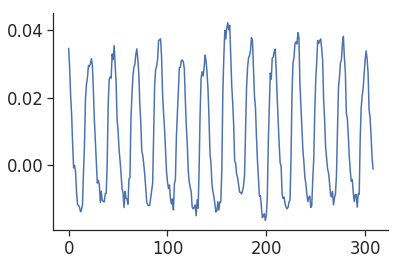

In [39]:
# popuation average response
plt.plot(tdf.trace.mean())

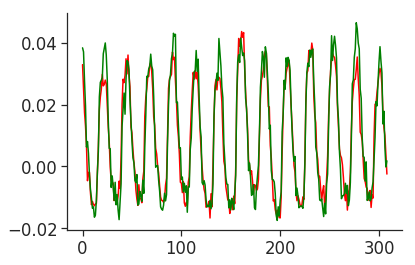

In [153]:
fig,ax=plt.subplots()
ax.plot(
    tdfm[(tdfm['flash_metrics_labels'] != "low-lick,low-reward")].trace.mean(),
    color='red'
)
ax.plot(
    tdfm[(tdfm['flash_metrics_labels'] == "low-lick,low-reward")].trace.mean(),
    color='green'
)

In [42]:
session.stimulus_presentations.head(20)

,duration,end_frame,image_index,image_name,image_set,index,omitted,orientation,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,,
0,0.25020,18002.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,0,False,NaN,17987,309.911006,310.161206
1,0.25022,18047.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,1,False,NaN,18032,310.661616,310.911836
2,0.25021,18092.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,2,False,NaN,18077,311.412226,311.662436
3,0.25023,18137.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,3,False,NaN,18122,312.162836,312.413066
4,0.25020,18182.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,4,False,NaN,18167,312.913446,313.163646
5,0.25020,18227.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,5,False,NaN,18212,313.664066,313.914266
6,0.25021,18272.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,6,False,NaN,18257,314.414666,314.664876
7,0.25020,18317.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,7,False,NaN,18302,315.165276,315.415476
8,0.25009,18362.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07...,8,False,NaN,18347,315.915986,316.166076


### Get omission triggered responses 

In [43]:
odf = analysis.get_response_df(df_name='omission_response_df')

loading omission_response_df


In [44]:
odf.keys()

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_omission', 'p_value_stimulus', 'duration', 'end_frame',
       'image_index', 'image_name', 'image_set', 'index', 'omitted',
       'orientation', 'start_frame', 'start_time', 'stop_time',
       'prior_image_name', 'time_from_last_lick', 'time_from_last_reward',
       'time_from_last_change', 'change', 'block_index',
       'image_block_repetition', 'index_within_block', 'licks', 'rewards',
       'mean_running_speed', 'pre_flash_running_speed', 'flash_after_omitted',
       'flash_after_change', 'response_latency', 'response_binary',
       'early_lick', 'licked', 'lick_rate', 'rewarded', 'reward_rate',
       'running_rate'],
      dtype='object')

In [45]:
odf.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,duration,end_frame,image_index,image_name,image_set,index,omitted,orientation,start_frame,start_time,stop_time,prior_image_name,time_from_last_lick,time_from_last_reward,time_from_last_change,change,block_index,image_block_repetition,index_within_block,licks,rewards,mean_running_speed,pre_flash_running_speed,flash_after_omitted,flash_after_change,response_latency,response_binary,early_lick,licked,lick_rate,rewarded,reward_rate,running_rate
0,22,1007088486,"[0.010109647410972852, -0.006541518892720449, ...","[-4.9758998853712955, -4.943588847154599, -4.9...",-0.129105,0.007106,0.9855,1.0000,NaN,NaN,8,omitted,omitted,0,True,NaN,18976,326.407746,NaN,im045,1.005336,10.374435,10.49176,False,1,0,NaN,[327.03682467943867],[],0.720943,0.57969,False,False,0.629079,True,False,1,0.650284,0,0.073094,1.857944
1,22,1007088554,"[0.06671063443701972, -0.017271905148269727, -...","[-4.9758998853712955, -4.943588847154599, -4.9...",0.000859,-0.001440,0.4893,0.5906,NaN,NaN,8,omitted,omitted,0,True,NaN,18976,326.407746,NaN,im045,1.005336,10.374435,10.49176,False,1,0,NaN,[327.03682467943867],[],0.720943,0.57969,False,False,0.629079,True,False,1,0.650284,0,0.073094,1.857944
2,22,962541896,"[0.1356211548537663, 0.25669819927714504, 0.17...","[-4.9758998853712955, -4.943588847154599, -4.9...",0.034112,0.002656,0.3605,0.2944,NaN,NaN,8,omitted,omitted,0,True,NaN,18976,326.407746,NaN,im045,1.005336,10.374435,10.49176,False,1,0,NaN,[327.03682467943867],[],0.720943,0.57969,False,False,0.629079,True,False,1,0.650284,0,0.073094,1.857944
3,22,1007088480,"[0.045439467374870354, 0.08886504525002119, -0...","[-4.9758998853712955, -4.943588847154599, -4.9...",-0.020448,0.009309,0.8542,0.9540,NaN,NaN,8,omitted,omitted,0,True,NaN,18976,326.407746,NaN,im045,1.005336,10.374435,10.49176,False,1,0,NaN,[327.03682467943867],[],0.720943,0.57969,False,False,0.629079,True,False,1,0.650284,0,0.073094,1.857944
4,22,1007088540,"[0.34422617362154984, 0.15153869152933372, 0.2...","[-4.9758998853712955, -4.943588847154599, -4.9...",-0.054031,0.033714,0.7877,0.9762,NaN,NaN,8,omitted,omitted,0,True,NaN,18976,326.407746,NaN,im045,1.005336,10.374435,10.49176,False,1,0,NaN,[327.03682467943867],[],0.720943,0.57969,False,False,0.629079,True,False,1,0.650284,0,0.073094,1.857944


In [46]:
odfm = odf.merge(
    flash_summary.query('behavior_session_id == @behavior_session_id'),
    left_on = 'stimulus_presentations_id',
    right_on = 'flash_index',
    how = 'left'
)
odfm.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,duration,end_frame,image_index_x,image_name_x,image_set,index,omitted_x,orientation,start_frame_x,start_time_x,stop_time_x,prior_image_name,time_from_last_lick,time_from_last_reward,time_from_last_change,change_x,block_index,image_block_repetition,index_within_block,licks,rewards,mean_running_speed,pre_flash_running_speed,flash_after_omitted,flash_after_change,response_latency,response_binary,early_lick,licked_x,lick_rate_x,rewarded_x,reward_rate_x,running_rate_x,_id,flash_index,image_index_y,image_name_y,omitted_y,change_y,licked_y,lick_rate_y,rewarded_y,reward_rate_y,running_rate_y,bout_rate,hit_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick,high_reward,flash_metrics_epochs,flash_metrics_labels,in_bout,bias,omissions1,task0,timing1D,start_time_y,start_frame_y,stop_time_y,epoch,behavior_session_id,criterion_negative,motivation_state,session_cluster_id,session_cluster_name
0,22,1007088486,"[0.010109647410972852, -0.006541518892720449, ...","[-4.9758998853712955, -4.943588847154599, -4.9...",-0.129105,0.007106,0.9855,1.0000,NaN,NaN,8,omitted,omitted,0,True,NaN,18976,326.407746,NaN,im045,1.005336,10.374435,10.49176,False,1,0,NaN,[327.03682467943867],[],0.720943,0.57969,False,False,0.629079,True,False,1,0.650284,0,0.073094,1.857944,5e94f5d122cbdf42dd7f3689,22,8,omitted,1,0,1,0.650284,0,0.073094,1.700945,0.206679,0.0,0.353659,1.0,0.0,0.106,0.894,3.574433,0.539132,1,1,1,"high-lick,high-reward",0,-0.221438,2.0061,2.949432,0.759346,316.527082,18976,NaN,0.0,965034185,NaN,uncategorized,5.0,Grey Screen Impulsive
1,22,1007088554,"[0.06671063443701972, -0.017271905148269727, -...","[-4.9758998853712955, -4.943588847154599, -4.9...",0.000859,-0.001440,0.4893,0.5906,NaN,NaN,8,omitted,omitted,0,True,NaN,18976,326.407746,NaN,im045,1.005336,10.374435,10.49176,False,1,0,NaN,[327.03682467943867],[],0.720943,0.57969,False,False,0.629079,True,False,1,0.650284,0,0.073094,1.857944,5e94f5d122cbdf42dd7f3689,22,8,omitted,1,0,1,0.650284,0,0.073094,1.700945,0.206679,0.0,0.353659,1.0,0.0,0.106,0.894,3.574433,0.539132,1,1,1,"high-lick,high-reward",0,-0.221438,2.0061,2.949432,0.759346,316.527082,18976,NaN,0.0,965034185,NaN,uncategorized,5.0,Grey Screen Impulsive
2,22,962541896,"[0.1356211548537663, 0.25669819927714504, 0.17...","[-4.9758998853712955, -4.943588847154599, -4.9...",0.034112,0.002656,0.3605,0.2944,NaN,NaN,8,omitted,omitted,0,True,NaN,18976,326.407746,NaN,im045,1.005336,10.374435,10.49176,False,1,0,NaN,[327.03682467943867],[],0.720943,0.57969,False,False,0.629079,True,False,1,0.650284,0,0.073094,1.857944,5e94f5d122cbdf42dd7f3689,22,8,omitted,1,0,1,0.650284,0,0.073094,1.700945,0.206679,0.0,0.353659,1.0,0.0,0.106,0.894,3.574433,0.539132,1,1,1,"high-lick,high-reward",0,-0.221438,2.0061,2.949432,0.759346,316.527082,18976,NaN,0.0,965034185,NaN,uncategorized,5.0,Grey Screen Impulsive
3,22,1007088480,"[0.045439467374870354, 0.08886504525002119, -0...","[-4.9758998853712955, -4.943588847154599, -4.9...",-0.020448,0.009309,0.8542,0.9540,NaN,NaN,8,omitted,omitted,0,True,NaN,18976,326.407746,NaN,im045,1.005336,10.374435,10.49176,False,1,0,NaN,[327.03682467943867],[],0.720943,0.57969,False,False,0.629079,True,False,1,0.650284,0,0.073094,1.857944,5e94f5d122cbdf42dd7f3689,22,8,omitted,1,0,1,0.650284,0,0.073094,1.700945,0.206679,0.0,0.353659,1.0,0.0,0.106,0.894,3.574433,0.539132,1,1,1,"high-lick,high-reward",0,-0.221438,2.0061,2.949432,0.759346,316.527082,18976,NaN,0.0,965034185,NaN,uncategorized,5.0,Grey Screen Impulsive
4,22,1007088540,"[0.34422617362154984, 0.15153869152933372, 0.2...","[-4.9758998853712955, -4.943588847154599, -4.9...",-0.054031,0.033714,0.7877,0.9762,NaN,NaN,8,omitted,omitted,0,True,NaN,18976,326.407746,NaN,im045,1.005336,10.374435,10.49176,False,1,0,NaN,[327.03682467943867],[],0.720943,0.57969,False,False,0.629079,True,False,1,0.650284,0,0.073094,1.8579

In [47]:
len(odfm.cell_specimen_id.unique())

11

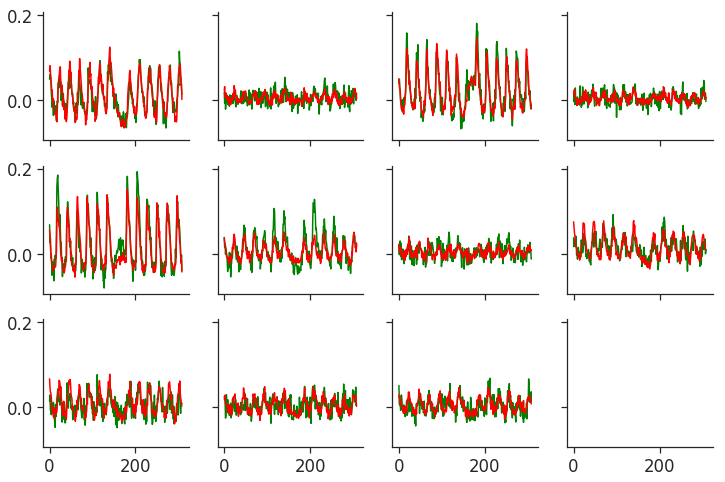

In [48]:
fig,axes = plt.subplots(3,4,figsize=(12,8),sharex=True,sharey=True)
for ii, cell_id in enumerate(odfm.cell_specimen_id.unique()):
    ax = axes.flatten()[ii]
    ax.plot(
        odfm.query('cell_specimen_id == @cell_id and flash_metrics_labels == "low-lick,low-reward"').trace.mean(),
        color='green'
    )
    ax.plot(
        odfm.query('cell_specimen_id == @cell_id and flash_metrics_labels != "low-lick,low-reward"').trace.mean(),
        color='red'
    )

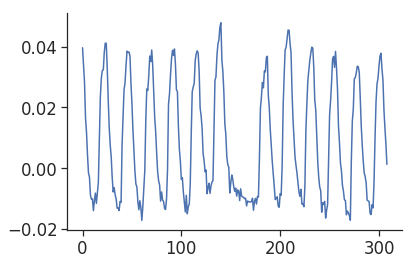

In [49]:
# popuation average response
plt.plot(odf.trace.mean())

### Get running behavior for omissions 

In [50]:
run_df = analysis.get_response_df(df_name='trials_run_speed_df')

loading trials_run_speed_df


In [154]:
run_df_merged = run_df.merge(
    flash_summary_this_session,
    left_on = 'change_time',
    right_on = 'start_time',
    how = 'left'
)

In [155]:
run_df_merged.head()

,index,trials_id,trace,trace_timestamps,mean_response,baseline_response,p_value_omission,p_value_stimulus,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,auto_rewarded,correct_reject,start_time_x,stop_time_x,trial_length,behavioral_response_time,change_frame,change_time,behavioral_response_latency,initial_image_name,change_image_name,_id,flash_index,image_index,image_name,omitted,change,licked,lick_rate,rewarded,reward_rate,running_rate,bout_rate,hit_bout,hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,high_lick,high_reward,flash_metrics_epochs,flash_metrics_labels,in_bout,bias,omissions1,task0,timing1D,start_frame,stop_time_y,epoch,behavior_session_id,criterion_negative,motivation_state,session_cluster_id,session_cluster_name,stimulus_presentations_id,start_time_y
0,0,1,"[-0.046977833116290404, 0.5993935138177797, 0....","[-4.98744451180347, -4.970764095376033, -4.954...",0.367077,0.485099,0.7654,0.7579,"[316.4114781393006, 316.6450414329809, 316.795...",316.033311,0.005,False,False,False,True,False,False,False,True,False,311.375120,320.148806,8.773687,NaN,18346.0,315.915986,0.495492,im000,im045,5e94f5d022cbdf42dd7f367b,8,4,im045,0,1,1,0.296296,1,0.016461,0.406770,0.296296,1.0,0.055556,1.0,0.0,0.212500,0.787500,3.124125,0.764286,1,0,2,"high-lick,low-reward",0,-0.265114,2.006113,2.949772,0.739571,18347,306.285281,0.0,965034185,NaN,uncategorized,5.0,Grey Screen Impulsive,8.0,315.915986
1,2,28,"[-1.3556927332439237, -1.3532566237683876, -1....","[-4.98744451180347, -4.970764095376033, -4.954...",0.021750,0.096310,0.8411,0.8372,"[398.21134857409237, 398.2947491362666, 398.42...",397.845319,0.005,False,False,False,True,False,False,False,True,False,392.440947,401.948636,9.507689,NaN,23251.0,397.732426,0.478923,im045,im035,5e94f5d722cbdf42dd7f36e8,117,7,im035,0,1,1,0.671455,1,0.021067,1.794642,0.338887,1.0,0.062164,1.0,0.0,0.242192,0.757808,3.025617,0.813540,1,0,2,"high-lick,low-reward",0,-0.312677,2.006957,2.947333,1.199982,23252,388.102806,0.0,965034185,NaN,uncategorized,5.0,Grey Screen Impulsive,117.0,397.732426
2,4,68,"[4.623882032072478, 4.765644398752604, 4.67940...","[-4.98744451180347, -4.970764095376033, -4.954...",0.056334,0.061132,0.8354,0.8275,"[491.87083992045916, 492.0042457708036, 492.10...",491.671582,0.005,False,False,False,True,False,False,False,True,False,487.768506,495.775162,8.006656,NaN,28876.0,491.558676,0.312164,im035,im106,5e94f5e022cbdf42dd7f3765,242,1,im106,0,1,1,0.623799,1,0.012458,1.753727,0.334224,1.0,0.037275,1.0,0.0,0.243601,0.756399,3.021115,0.815790,1,0,2,"high-lick,low-reward",0,-0.631412,2.009148,2.942604,2.012384,28877,481.930238,0.0,965034185,NaN,uncategorized,5.0,Grey Screen Impulsive,242.0,491.558676
3,6,82,"[-1.2864819150159639, 0.998284255254892, 0.998...","[-4.98744451180347, -4.970764095376033, -4.954...",0.103185,0.565398,0.8299,0.8137,"[539.1926096484214, 539.326098879431, 539.4595...",538.967446,0.005,False,False,False,True,False,False,False,True,False,535.057119,543.080066,8.022947,NaN,31711.0,538.847136,0.345474,im106,im035,5e94f5e422cbdf42dd7f37a4,305,7,im035,0,1,1,0.616710,1,0.011398,1.621851,0.337673,1.0,0.033754,1.0,0.0,0.246816,0.753184,3.010891,0.820902,1,0,2,"high-lick,low-reward",0,-0.348403,2.011053,2.936223,1.906959,31712,529.219269,0.0,965034185,NaN,uncategorized,5.0,Grey Screen Impulsive,305.0,538.847136
4,8,91,"[1.4369663028350115, 0.6685113986423245, 1.870...","[-4.98744451180347, -4.970764095376033, -4.954...",12.737287,6.230054,0.5258,0.5048,"[559.5759015403795, 559.7093430834993, 559.876...",559.243129,0.005,False,False,False,True,False,False,False,True,False,556.074001,563.330248,7.256247,NaN,32926.0,559.113616,0.462286,im035,im045,5e94f5e722cbdf42dd7f37bf,332,4,im045,0,1,1,0.595964,1,0.011615,1.445778,0.326745,1.0,0.035546,1.0,0.0,0.238425,0.761575,3.037727,0.807484,1,0,2,"high-lick,low-reward",0,-0.189286,2.011721,2.933320,1.893106,32927,549.485998,0.0,965034185,NaN,uncategorized,5.0,

Text(0.5, 0, 'stimulus frames')

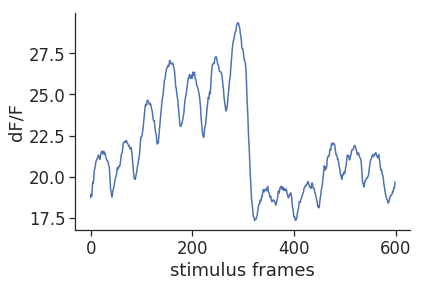

In [159]:
# running speed averaged across all trials
plt.plot(run_df.trace.mean())
plt.ylabel('dF/F')
plt.xlabel('stimulus frames')

Text(0.5, 0, 'stimulus frames')

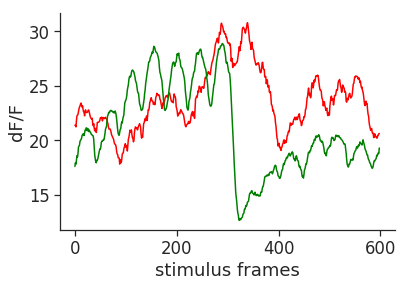

In [161]:
# running speed averaged across all trials
fig,ax=plt.subplots()
ax.plot(
    run_df_merged[(run_df_merged['flash_metrics_labels'] == "low-lick,low-reward")].trace.mean(),
    color='red'
)
ax.plot(
    run_df_merged[(run_df_merged['flash_metrics_labels'] != "low-lick,low-reward")].trace.mean(),
    color='green'
)
ax.set_ylabel('dF/F')
ax.set_xlabel('stimulus frames')

### get mean response dataframe for some set of conditions 

In [53]:
sdf = analysis.stimulus_response_df.copy() # can get this via lazy loading as well

loading stimulus_response_df


In [54]:
import visual_behavior.ophys.response_analysis.utilities as utilities

In [55]:
conditions = ['cell_specimen_id', 'image_name'] # conditions to groupby before averaging
mean_df = utilities.get_mean_df(sdf, cache_dir, conditions=conditions, flashes=True)

In [56]:
mean_df.head()

,cell_specimen_id,image_name,mean_response,sem_response,mean_trace,sem_trace,mean_responses,mean_baseline,sem_baseline,pref_stim,fraction_significant_p_value_omission,fraction_significant_p_value_stimulus
0,962541896,im000,0.018037,0.002694,"[0.01979722652063934, 0.010424825134588048, 0....","[0.004522169182597412, 0.004443001388723701, 0...","[0.07462974561760354, 0.04060355972826346, -0....",NaN,NaN,False,0.011080,0.011080
1,962541896,im031,0.022153,0.002286,"[0.017679136337997253, 0.005742120277011842, 0...","[0.0038172645731773995, 0.003976137163098941, ...","[0.03803943380266926, 0.014977897416935932, 5....",NaN,NaN,False,0.010889,0.010889
2,962541896,im035,0.047029,0.003328,"[0.038736696807985777, 0.028012774346664954, 0...","[0.005399443111235733, 0.0048118854398072775, ...","[-0.026758887102313708, 0.10876810464356951, 0...",NaN,NaN,False,0.063670,0.054307
3,962541896,im045,0.034858,0.002335,"[0.03028247943548947, 0.02173323207653629, 0.0...","[0.0034954459518438167, 0.0033395739367759777,...","[-0.01746119339473444, -0.004228383225209408, ...",NaN,NaN,False,0.033654,0.032452
4,962541896,im054,0.060928,0.003387,"[0.0662127894557505, 0.05325153730410995, 0.03...","[0.005245845086026036, 0.004998267109718226, 0...","[0.18107154412287482, 0.06323806819249089, -0....",NaN,NaN,False,0.063158,0.061404


### plot mean trace for a cells preferred stimulus

In [57]:
# the get_mean_df function computes the preferred stimulus and adds it as a Boolean column

In [58]:
mean_trace = mean_df[(mean_df.cell_specimen_id==cell_specimen_id)&(mean_df.pref_stim==True)].mean_trace.values[0]

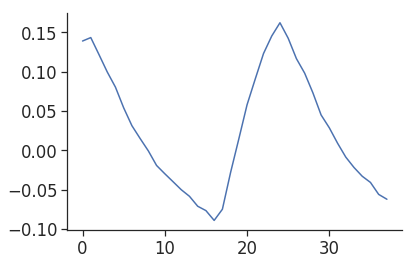

In [59]:
plt.plot(mean_trace)